In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
product_descriptions = pd.read_csv('./dataset/product_descriptions.csv')
product_descriptions.shape
product_descriptions.head(30)

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...
5,100006,Achieving delicious results is almost effortle...
6,100007,The Quantum Adjustable 2-Light LED Black Emerg...
7,100008,The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8,100009,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9,100010,Valley View Industries Metal Stakes (4-Pack) a...


In [3]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [4]:
MAXIMUM_VALUES = 5000 # Max 120000
CLUSTERS_COUNT = int(MAXIMUM_VALUES / 100)

product_descriptions1 = product_descriptions.head(MAXIMUM_VALUES)

In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])

c:\utils\libs\python\3.9\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


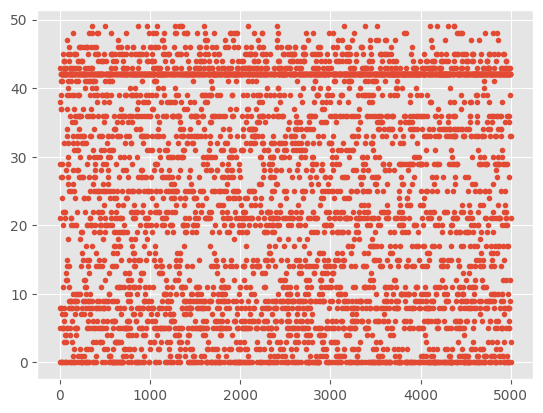

In [6]:
X=X1

kmeans = KMeans(n_clusters = CLUSTERS_COUNT, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [7]:
true_k = CLUSTERS_COUNT

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=10, n_init=1)
model.fit(X1)

KMeans(max_iter=10, n_clusters=50, n_init=1)

In [8]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 panels
 wall
 panel
 ft
 easy
 hooks
 room
 home
 proslat
 look
Cluster 1:
 tile
 indoor
 wall
 recommended
 residential
 thinset
 frost
 ceramic
 commercial
 pieces
Cluster 2:
 pipe
 pvc
 sharkbite
 fittings
 tubing
 pex
 water
 cpvc
 gas
 valve
Cluster 3:
 water
 heater
 tank
 hot
 gas
 nox
 gal
 rheem
 households
 energy
Cluster 4:
 screen
 frame
 roller
 spline
 window
 insect
 aluminum
 waddell
 dowel
 84
Cluster 5:
 outdoor
 use
 home
 metal
 indoor
 easy
 wall
 used
 included
 clear
Cluster 6:
 flooring
 installation
 vinyl
 tiles
 gripstrip
 real
 trafficmaster
 allure
 wood
 floor
Cluster 7:
 ft
 easy
 steel
 use
 used
 heavy
 duty
 durable
 construction
 resistant
Cluster 8:
 lumber
 grading
 highest
 standards
 bamboo
 meets
 strength
 piece
 painted
 furniture
Cluster 9:
 light
 bulb
 watt
 energy
 hours
 fluorescent
 day
 based
 cost
 incandescent
Cluster 10:
 insulation
 ecotouch
 corning
 owens
 thermal
 monthly
 sound
 radiant
 cooling

In [9]:
def get_random_from_cluster(cluster_id):
	res = np.where(y_kmeans == cluster_id)
	return res[0][rd.randint(0, len(res[0]))] + 100000

def get_description(id):
	return product_descriptions.get(product_descriptions['product_uid'] == id)['product_description'].array[0]

def get_cluster_description(item):
	prediction = model.predict(vectorizer.transform(["clothes shelf"]))
	print("Cluster ID for [", item, "]", " is ", prediction[0])
	print("3 recommended items:")
	print(get_description(get_random_from_cluster(prediction[0])), end="\n\n")
	print(get_description(get_random_from_cluster(prediction[0])), end="\n\n")
	print(get_description(get_random_from_cluster(prediction[0])), end="\n\n")

def get_cluster_ids(item):
	prediction = model.predict(vectorizer.transform(["clothes shelf"]))
	print("Cluster ID for [", item, "]", " is ", prediction[0])
	print("3 recommended items:")
	print(get_random_from_cluster(prediction[0]))
	print(get_random_from_cluster(prediction[0]))
	print(get_random_from_cluster(prediction[0]))

In [10]:
get_cluster_ids('shelf')

Cluster ID for [ shelf ]  is  44
3 recommended items:
103462
103914
102571


In [11]:
get_cluster_ids('light bulb')

Cluster ID for [ light bulb ]  is  44
3 recommended items:
104229
100205
102553


In [12]:
get_cluster_ids('wooden chair')

Cluster ID for [ wooden chair ]  is  44
3 recommended items:
103282
100876
101555


In [15]:
get_cluster_ids('stainless steel knife')

Cluster ID for [ stainless steel knife ]  is  44
3 recommended items:
104285
102030
102198
